In [2]:
import pandas as pd

In [3]:
#to load the data back in use
df_full = pd.read_pickle('original_turnstile_df.pkl')

In [4]:
df_full.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454


In [5]:
#create a new column with using the date & time columns,
# then turning it into a datetime object
df_full['DateTime'] = pd.to_datetime(df_full.DATE.astype(str) + " " + df_full.TIME.astype(str))

In [7]:
#remove whitespace from the column titles
df_full.columns = [column.strip() for column in df_full.columns]
df_full.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DateTime'],
      dtype='object')

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628297 entries, 0 to 209660
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   C/A       628297 non-null  object        
 1   UNIT      628297 non-null  object        
 2   SCP       628297 non-null  object        
 3   STATION   628297 non-null  object        
 4   LINENAME  628297 non-null  object        
 5   DIVISION  628297 non-null  object        
 6   DATE      628297 non-null  object        
 7   TIME      628297 non-null  object        
 8   DESC      628297 non-null  object        
 9   ENTRIES   628297 non-null  int64         
 10  EXITS     628297 non-null  int64         
 11  DateTime  628297 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 62.3+ MB


In [10]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

In [13]:
#grouping by turnstiles locations and summing entries/exits by date
# note that SCP is the only location specific column that changes
turnstiles_df = df_full.groupby(['C/A', 'UNIT', 'STATION', 'SCP', 'DATE' ]).sum().reset_index()


In [14]:
turnstiles_df.head(1000)

,C/A,UNIT,STATION,SCP,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,02-00-00,08/29/2020,44705127,15200485
1,A002,R051,59 ST,02-00-00,08/30/2020,44706856,15201071
2,A002,R051,59 ST,02-00-00,08/31/2020,44708630,15201988
3,A002,R051,59 ST,02-00-00,09/01/2020,44711777,15203251
4,A002,R051,59 ST,02-00-00,09/02/2020,44714663,15204492
5,A002,R051,59 ST,02-00-00,09/03/2020,44717913,15205746
6,A002,R051,59 ST,02-00-00,09/04/2020,44721098,15207001
7,A002,R051,59 ST,02-00-00,09/05/2020,44724185,15208053
8,A002,R051,59 ST,02-00-00,09/06/2020,44726424,15208740
9,A002,R051,59 ST,02-00-00,09/07/2020,44728130,15209351


In [19]:
#just choose one turnstile at a station
first_turnstile_df = turnstiles_df.loc[lambda turnstiles_df: turnstiles_df['STATION'] == '59 ST'].loc[lambda turnstiles_df: turnstiles_df['SCP'] == '02-00-00'].loc[lambda turnstiles_df: turnstiles_df['UNIT'] == 'R051'].loc[lambda turnstiles_df: turnstiles_df['C/A'] == 'A002']


In [20]:
first_turnstile_df

,C/A,UNIT,STATION,SCP,DATE,ENTRIES,EXITS
0,A002,R051,59 ST,02-00-00,08/29/2020,44705127,15200485
1,A002,R051,59 ST,02-00-00,08/30/2020,44706856,15201071
2,A002,R051,59 ST,02-00-00,08/31/2020,44708630,15201988
3,A002,R051,59 ST,02-00-00,09/01/2020,44711777,15203251
4,A002,R051,59 ST,02-00-00,09/02/2020,44714663,15204492
5,A002,R051,59 ST,02-00-00,09/03/2020,44717913,15205746
6,A002,R051,59 ST,02-00-00,09/04/2020,44721098,15207001
7,A002,R051,59 ST,02-00-00,09/05/2020,44724185,15208053
8,A002,R051,59 ST,02-00-00,09/06/2020,44726424,15208740
9,A002,R051,59 ST,02-00-00,09/07/2020,44728130,15209351


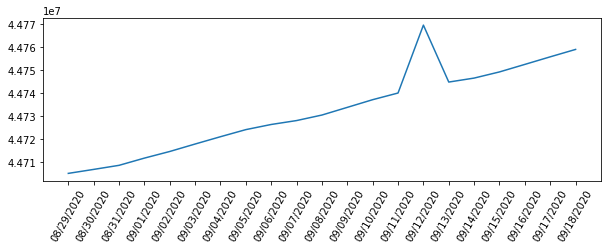

In [21]:
#plot the daily timeseries for a single turnstile

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.xticks(rotation=60)
plt.plot(first_turns_df['DATE'],first_turns_df['ENTRIES'])

In [39]:
stations_grouped_df = turnstiles_df.reset_index().loc[lambda turnstiles_df: turnstiles_df['STATION'] == '59 ST'].loc[lambda turnstiles_df: turnstiles_df['UNIT'] == 'R051']
stations_grouped_df.shape

(532, 7)

In [40]:
test_df = turnstiles_df.reset_index().loc[lambda turnstiles_df: turnstiles_df['STATION'] == '59 ST']
test_df.shape

(1115, 7)

In [47]:
#check how many unique subway stations there are: 379
df_full['STATION'].nunique()

379

In [48]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,1.036840e+05,1.036840e+05
mean,2.568741e+08,2.120121e+08
std,1.332178e+09,1.209789e+09
min,0.000000e+00,0.000000e+00
25%,1.576524e+06,6.434058e+05
50%,1.029242e+07,6.030265e+06
75%,3.830513e+07,2.549300e+07
max,6.326147e+10,5.773950e+10


In [51]:
type(df_full['DateTime'])

pandas.core.series.Series

In [52]:
df_full

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DateTime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,00:00:00,REGULAR,7450785,2533372,2020-08-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,04:00:00,REGULAR,7450788,2533375,2020-08-29 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,08:00:00,REGULAR,7450798,2533391,2020-08-29 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,12:00:00,REGULAR,7450826,2533423,2020-08-29 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/29/2020,16:00:00,REGULAR,7450910,2533454,2020-08-29 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209656,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,05:00:00,REGULAR,5554,541,2020-09-18 05:00:00
209657,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,09:00:00,REGULAR,5554,541,2020-09-18 09:00:00
209658,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,13:00:00,REGULAR,5554,541,2020-09-18 13:00:00
209659,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,17:00:00,REGULAR,5554,541,2020-09-18 17:00:00


In [88]:
#group stations and sum daily entries and exits
dates = df_full['DateTime'].dt.date
station_by_date = df_full.groupby(['STATION', dates]).sum()

station_by_date.head(100)

ENTRIES  \
STATION       DateTime                  
1 AV          2020-08-29   2772051364   
              2020-08-30   2772073522   
              2020-08-31   2772098556   
              2020-09-01   2772130928   
              2020-09-02   2772165030   
              2020-09-03   2772200329   
              2020-09-04   2772235846   
              2020-09-05   2772269658   
              2020-09-06   2772293710   
              2020-09-07   2772314028   
              2020-09-08   2772338982   
              2020-09-09   2772374050   
              2020-09-10   2772411119   
              2020-09-11   2772446834   
              2020-09-12   2772483587   
              2020-09-13   2772510777   
              2020-09-14   2772536244   
              2020-09-15   2772571844   
              2020-09-16   2772609076   
              2020-09-17   2772646752   
              2020-09-18   2774257772   
103 ST        2020-08-29    812887428   
              2020-08-30    812912518   
              2020-08-31    812946484   
              2020-09-01    812995893   
              2020-09-02    801021464   
              2020-09-03    740943386   
              2020-09-04    740996707   
              2020-09-05    741044208   
              2020-09-06    741077561   
              2020-09-07    765160112   
              2020-09-08    797851408   
              2020-09-09    813360462   
              2020-09-10    813416292   
              2020-09-11    813472302   
              2020-09-12   1845018941   
              2020-09-13    813558804   
              2020-09-14    813599043   
              2020-09-15    813656292   
              2020-09-16    813715379   
              2020-09-17    813774606   
              2020-09-18    813834456   
103 ST-CORONA 2020-08-29    376497072   
              2020-08-30    376527319   
              2020-08-31    376567753   
              2020-09-01    376617371   
              2020-09-02    376669083   
              2020-09-03    376722946   
              2020-09-04    376776918   
              2020-09-05    376824156   
              2020-09-06    376859324   
              2020-09-07    376892281   
              2020-09-08    376937668   
              2020-09-09    376991635   
              2020-09-10    377046169   
              2020-09-11    377103383   
              2020-09-12    377153005   
              2020-09-13    377188746   
              2020-09-14    377235430   
              2020-09-15    377292737   
              2020-09-16    377348239   
              2020-09-17    377405789   
              2020-09-18    377463554   
104 ST        2020-08-29  10149180708   
              2020-08-30  10149185199   
              2020-08-31  10149192687   
              2020-09-01  10149202252   
              2020-09-02  10149212199   
              2020-09-03  10149222405   
              2020-09-04  10149232459   
              2020-09-05  10149240308   
              2020-09-06  10149245814   
              2020-09-07  10149250992   
              2020-09-08  10149259337   
              2020-09-09  10149269638   
              2020-09-10  10149279901   
              2020-09-11  10149290284   
              2020-09-12  10149298200   
              2020-09-13  10149303453   
              2020-09-14  10149310698   
              2020-09-15  10149320211   
              2020-09-16  10149330616   
              2020-09-17  10149341473   
              2020-09-18  10149351809   
110 ST        2020-08-29    245270985   
              2020-08-30    245280498   
              2020-08-31    245292854   
              2020-09-01    245311422   
              2020-09-02    245330716   
              2020-09-03    245350137   
              2020-09-04    245370553   
              2020-09-05    245388992   
              2020-09-06    245401031   
              2020-09-07    245411559   
              2020-09-08    245426644   
              2020-09-09    245447858   
            

In [89]:
#stations grouped by date and time
station_df_datetime = df_full.groupby(['STATION', 'DateTime']).sum()

station_df_datetime.head(500)

ENTRIES  \
STATION       DateTime                          
1 AV          2020-08-29 00:00:00   462007637   
              2020-08-29 04:00:00   462007718   
              2020-08-29 08:00:00   462007817   
              2020-08-29 12:00:00   462008319   
              2020-08-29 16:00:00   462009359   
              2020-08-29 20:00:00   462010514   
              2020-08-30 00:00:00   462011257   
              2020-08-30 04:00:00   462011331   
              2020-08-30 08:00:00   462011429   
              2020-08-30 12:00:00   462012045   
              2020-08-30 16:00:00   462013195   
              2020-08-30 20:00:00   462014265   
              2020-08-31 00:00:00   462014965   
              2020-08-31 04:00:00   462015015   
              2020-08-31 08:00:00   462015276   
              2020-08-31 12:00:00   462016123   
              2020-08-31 16:00:00   462017559   
              2020-08-31 20:00:00   462019618   
              2020-09-01 00:00:00   462020306   
              2020-09-01 04:00:00   462020343   
              2020-09-01 08:00:00   462020634   
              2020-09-01 12:00:00   462021478   
              2020-09-01 16:00:00   462022975   
              2020-09-01 20:00:00   462025192   
              2020-09-02 00:00:00   462025939   
              2020-09-02 04:00:00   462025999   
              2020-09-02 08:00:00   462026322   
              2020-09-02 12:00:00   462027202   
              2020-09-02 16:00:00   462028663   
              2020-09-02 20:00:00   462030905   
              2020-09-03 00:00:00   462031773   
              2020-09-03 04:00:00   462031824   
              2020-09-03 08:00:00   462032135   
              2020-09-03 12:00:00   462033042   
              2020-09-03 16:00:00   462034601   
              2020-09-03 20:00:00   462036954   
              2020-09-04 00:00:00   462037700   
              2020-09-04 04:00:00   462037762   
              2020-09-04 08:00:00   462038027   
              2020-09-04 12:00:00   462038951   
              2020-09-04 16:00:00   462040603   
              2020-09-04 20:00:00   462042803   
              2020-09-05 00:00:00   462043849   
              2020-09-05 04:00:00   462043951   
              2020-09-05 08:00:00   462044074   
              2020-09-05 12:00:00   462044698   
              2020-09-05 16:00:00   462045893   
              2020-09-05 20:00:00   462047193   
              2020-09-06 00:00:00   462048032   
              2020-09-06 04:00:00   462048110   
              2020-09-06 08:00:00   462048220   
              2020-09-06 12:00:00   462048748   
              2020-09-06 16:00:00   462049795   
              2020-09-06 20:00:00   462050805   
              2020-09-07 00:00:00   462051435   
              2020-09-07 04:00:00   462051477   
              2020-09-07 08:00:00   462051590   
              2020-09-07 12:00:00   462052111   
              2020-09-07 16:00:00   462053125   
              2020-09-07 20:00:00   462054290   
              2020-09-08 00:00:00   462054868   
              2020-09-08 04:00:00   462054910   
              2020-09-08 08:00:00   462055278   
              2020-09-08 12:00:00   462056210   
              2020-09-08 16:00:00   462057769   
              2020-09-08 20:00:00   462059947   
              2020-09-09 00:00:00   462060633   
              2020-09-09 04:00:00   462060696   
              2020-09-09 08:00:00   462061039   
              2020-09-09 12:00:00   462062008   
              2020-09-09 16:00:00   462063654   
              2020-09-09 20:00:00   462066020   
              2020-09-10 00:00:00   462066851   
              2020-09-10 04:00:00   462066906   
              2020-09-10 08:00:00   462067287   
              2020-09-10 12:00:00   462068261   
              2020-09-10 16:00:00   462069745   
              2020-09-10 20:00:00   462072069   
              2020-09-11 00:00:00   462072751   
              2020-09-11 04:00:00   462072807   
              2020-0

In [91]:
#my new indices are the stations
station_by_date.loc['1 AV']

,ENTRIES,EXITS
DateTime,,
2020-08-29,2772051364,2821803902
2020-08-30,2772073522,2821834257
2020-08-31,2772098556,2821872843
2020-09-01,2772130928,2821918297
2020-09-02,2772165030,2821964773
2020-09-03,2772200329,2822012194
2020-09-04,2772235846,2822060545
2020-09-05,2772269658,2822102802
2020-09-06,2772293710,2822134327


In [92]:
station_by_date.loc['1 AV']['ENTRIES']

DateTime
2020-08-29    2772051364
2020-08-30    2772073522
2020-08-31    2772098556
2020-09-01    2772130928
2020-09-02    2772165030
2020-09-03    2772200329
2020-09-04    2772235846
2020-09-05    2772269658
2020-09-06    2772293710
2020-09-07    2772314028
2020-09-08    2772338982
2020-09-09    2772374050
2020-09-10    2772411119
2020-09-11    2772446834
2020-09-12    2772483587
2020-09-13    2772510777
2020-09-14    2772536244
2020-09-15    2772571844
2020-09-16    2772609076
2020-09-17    2772646752
2020-09-18    2774257772
Name: ENTRIES, dtype: int64

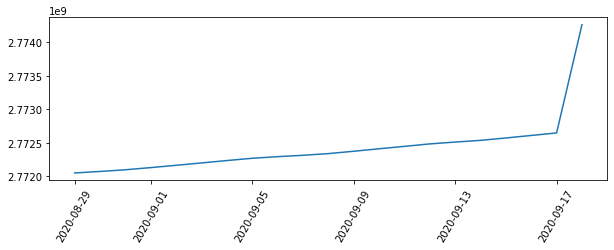

In [96]:
#plot the daily timeseries for a station including all turnstiles

xdates = station_by_date.loc['1 AV'].reset_index()['DateTime']
yentries = station_by_date.loc['1 AV']['ENTRIES']

plt.figure(figsize=(10,3))
plt.xticks(rotation=60)
plt.plot(xdates, yentries)

Was a bit skeptical with that last jump
I checked the differences between but I manually checked between the days and from the 17th to the 18th there was a jump of around 1million

Checking the 16th to the 17th there was a jump of about 37thousand

So it seems the plot is plausible